In [10]:
# Initialize everything

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

sns.set_theme()  # Use seaborn's default theme
plt.style.use('default')  # Use matplotlib's default style
%matplotlib inline

load_dotenv()

db_user = os.getenv('DB_USER', 'lmia_user')
db_password = os.getenv('DB_PASSWORD', 'lmia_password')
db_host = os.getenv('DB_HOST', 'localhost')
db_name = os.getenv('DB_NAME', 'lmia_stats')

engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}')

In [73]:
# Load data by employer for software & IT sectors
query = """
SELECT 
    e.employer,
    SUM(e.approved_positions) as total_approved_positions,
    COUNT(e.id) as total_data_periods,
    CONCAT(MIN(e.year), 'Q', MIN(e.quarter)) as first_period,
    CONCAT(MAX(e.year), 'Q', MAX(e.quarter)) as last_period
FROM employers e
WHERE (e.occupation LIKE '%%oftware%%'
   OR e.occupation LIKE '%%eveloper%%'
   OR e.occupation LIKE '%%rogrammer%%'
   OR e.occupation LIKE '%%atabase%%'
   OR e.occupation LIKE '%%Data Scien%%')
   AND e.employer IS NOT NULL
GROUP BY e.employer
ORDER BY total_approved_positions DESC
"""

df = pd.read_sql(query, engine)
df.head(20)

,employer,total_approved_positions,total_data_periods,first_period,last_period
0,Amazon Development Centre Canada ULC,902.0,39,2021Q1,2024Q4
1,"Amazon Canada Fulfillment Services, ULC",806.0,30,2019Q1,2024Q4
2,Conseillers en gestion et informatique CGI Inc.,733.0,67,2019Q1,2024Q4
3,COFOMO DÉVELOPPEMENT INC.,235.0,42,2019Q1,2024Q4
4,Groupe Technologies Desjardins inc.,173.0,35,2019Q1,2024Q4
5,Levio Conseils,168.0,30,2021Q1,2024Q4
6,Ubisoft Divertissements Inc.,165.0,39,2019Q1,2024Q4
7,Fortinet Technologies (Canada) ULC,147.0,42,2020Q1,2024Q4
8,Syntronic Research and Development Canada Inc.,145.0,48,2019Q1,2024Q4
9,Shopify Inc.,145.0,58,2019Q1,2024Q4


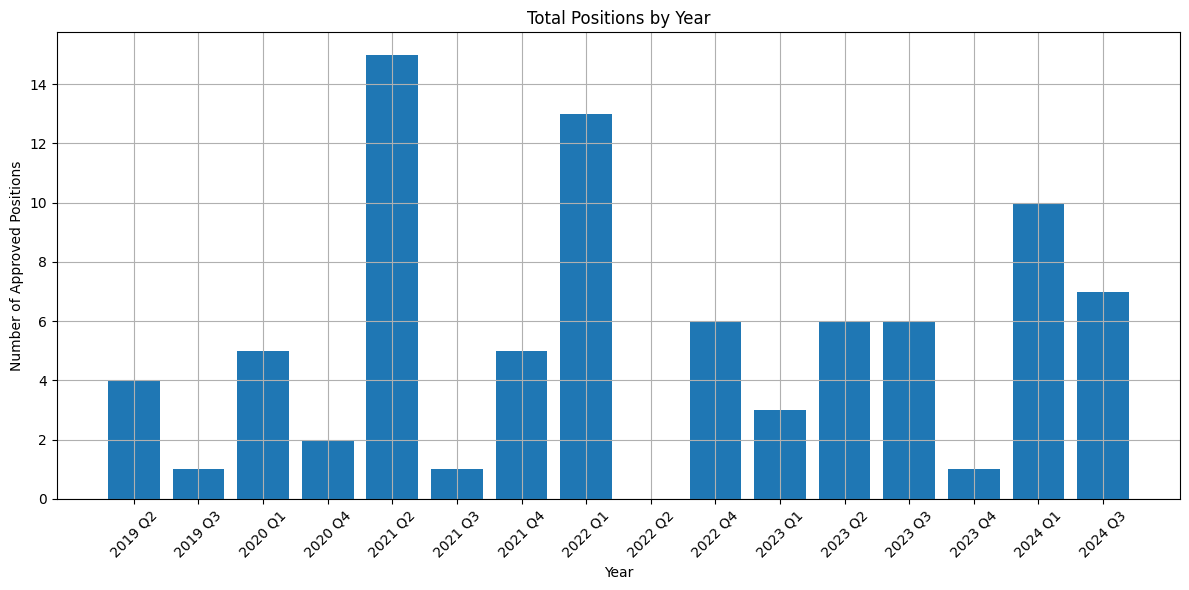

In [78]:
company_name_part = "ShoreWise Consulting"

query = f"""
SELECT 
    year,
    quarter,
    SUM(approved_positions) AS approved_positions
FROM employers e
WHERE (e.occupation LIKE '%%oftware%%'
   OR e.occupation LIKE '%%eveloper%%'
   OR e.occupation LIKE '%%rogrammer%%'
   OR e.occupation LIKE '%%atabase%%'
   OR e.occupation LIKE '%%Data Scien%%')
   AND e.employer LIKE '%%{company_name_part}%%'
GROUP BY year, quarter
ORDER BY year, quarter;
"""

# Load data into a DataFrame
df = pd.read_sql(query, engine).round(2)
df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

plt.figure(figsize=(12, 6))
plt.bar(df['period'], df['approved_positions'])

plt.title('Total Positions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Approved Positions')
plt.xticks(df['period'], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()